In [1]:
# just load every module I used
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import metrics 
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor
# http://xgboost.readthedocs.io/en/latest/python/python_intro.html
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV 
from pprint import pprint 
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from nltk import PorterStemmer
from nltk.stem.snowball import GermanStemmer
from sklearn import preprocessing
import spacy
from scipy import sparse 
from pandas.plotting import scatter_matrix

# nlp=spacy.load('de')

In [2]:
# read in data and preform simple of empty data and uniquness of the given features
data = pd.read_csv('~/Downloads/ml-price-prediction-dataset.csv', sep=';', low_memory=False, encoding='latin')
data


,restaurant_id,restaurant_name,testing,restaurant_description,product_id,variation_id,menu_category,product_name,product_description,price,...,longitude,chain_id,restaurant_active,city_id,dietary_characteristics,cuisine_characteristics,taste_characteristics,preparation_style_characteristics,dish_type_characteristics,ingredients
0,453,fit kitchen eat fit,0,gesundes fast food,35039,35037,fit pizza,pizza margherita,tomatensauce und fettarmer kaese,6.0,...,8.684631,NaN,1,9,['lakto vegetarisch'],"['gesundes essen', 'italienisch']","['mild', 'natuerlich']",['gebacken'],['pizza'],"['kaese', 'mehl', 'tomaten']"
1,453,fit kitchen eat fit,0,gesundes fast food,35040,35038,fit pizza,"pizza salami, putenschinken","fettarme salami, putenschinken und fettarmer k...",8.4,...,8.684631,NaN,1,9,['lakto vegetarisch'],"['gesundes essen', 'italienisch']",['natuerlich'],['gebacken'],['pizza'],"['kaese', 'mehl', 'salami', 'schinken', 'tomat..."
2,453,fit kitchen eat fit,0,gesundes fast food,35043,35041,fit pizza,pizza veggie + rucola,"pilze, zwiebeln, rucola und fettarmer kaese",8.4,...,8.684631,NaN,1,9,"['lakto vegetarisch', 'ohne rindfleisch', 'ohn...","['gesundes essen', 'italienisch']","['mild', 'natuerlich']",['gebacken'],['pizza'],"['kaese', 'mehl', 'pilz', 'rucola', 'tomatensa..."
3,453,fit kitchen eat fit,0,gesundes fast food,35045,35043,fit pizza,pizza sucuk jalapenos,"fettarme knoblauchwurst, jalapenos und fettarm...",8.4,...,8.684631,NaN,1,9,NaN,['italienisch'],['natuerlich'],['gebacken'],['pizza'],['jalapeno']
4,453,fit kitchen eat fit,0,gesundes fast food,35046,35044,fit pizza,pizza haehnchenbrust,"magere haehnchenbruststreifen, pilze, zwiebeln...",8.9,...,8.684631,NaN,1,9,['halal'],"['gesundes essen', 'italienisch']",['natuerlich'],['gebacken'],['pizza'],"['haehnchenbrustfilet', 'kaese', 'mehl', 'toma..."
5,453,fit kitchen eat fit,0,gesundes fast food,35051,35049,fit burger,classic burger,"mageres rindfleisch, eisbergsalat, tomaten, zw...",5.9,...,8.684631,NaN,1,9,['ohne schweinefleisch'],"['amerikanisch', 'gesundes essen']","['mild', 'natuerlich']",['gebraten'],['burger'],"['eisbergsalat', 'gurke', 'rindfleisch', 'toma..."
6,453,fit kitchen eat fit,0,gesundes fast food,35052,35050,fit burger,cheese burger,"mageres rindfleisch, low fat kaese, eisbergsal...",6.4,...,8.684631,NaN,1,9,['ohne schweinefleisch'],"['amerikanisch', 'gesundes essen']","['mild', 'natuerlich']",['gebraten'],['burger'],"['eisbergsalat', 'gurke', 'kaese', 'rindfleisc..."
7,453,fit kitchen eat fit,0,gesundes fast food,35053,35051,fit burger,chili cheese burger,"mageres rindfleisch, salat, jalapenos und fit ...",7.4,...,8.684631,NaN,1,9,['ohne schweinefleisch'],"['amerikanisch', 'gesundes essen']","['leicht scharf', 'natuerlich']",['gebraten'],['burger'],"['jalapeno', 'rindfleisch', 'salat']"
8,453,fit kitchen eat fit,0,gesundes fast food,35059,35057,fit beilagen,fit pommes,mit heissluft frittierte pommes,2.9,...,8.684631,NaN,1,9,['vegan'],"['amerikanisch', 'gesundes essen']",['natuerlich'],"['frittiert', 'gebacken']",['pommes'],['kartoffel']
9,453,fit kitchen eat fit,0,gesundes fast food,35060,35058,fit beilagen,fit coleslaw,fettarmer krautsalat,2.9,...,8.684631,NaN,1,9,NaN,['international'],['natuerlich'],['fusion mixed'],['extra'],['krautsalat']


In [3]:
print data.isnull().sum()

restaurant_id                            0
restaurant_name                          0
testing                                  0
restaurant_description                 257
product_id                               0
variation_id                             0
menu_category                            5
product_name                            13
product_description                   3895
price                                    0
postcode                               652
latitude                               224
longitude                              223
chain_id                             61193
restaurant_active                        0
city_id                                  0
dietary_characteristics              53810
cuisine_characteristics              41771
taste_characteristics                41771
preparation_style_characteristics    41771
dish_type_characteristics            41771
ingredients                          41784
dtype: int64


In [4]:
# from this we can see that there is missing data mostly 
# for chain_id so I would not use this column
# as a feature, lots of data is mising for dietary characteristics as for 
# cuisine, taste, preparation, dish type and ingredients
# however I belive that some of this information might 
# be valuable for predictions, for example the ingredients
# I would include data from this columns probably in the latter steps, 
# since it needs to be correctly parsed and mapped first

In [5]:
print 'Unique restaurant_id: {}'.format(len(data['restaurant_id'].unique()))
print 'Unique restaurant_name: {}'.format(len(data['restaurant_name'].unique()))
print 'Unique restaurant_description: {}'.format(len(data['restaurant_description'].unique()))
print 'Unique product_id: {}'.format(len(data['product_id'].unique()))
print 'Unique variation_id: {}'.format(len(data['variation_id'].unique()))
print 'Unique menu_category: {}'.format(len(data['menu_category'].unique()))
print 'Unique product_name: {}'.format(len(data['product_name'].unique()))
print 'Unique city_id: {}'.format(len(data['city_id'].unique()))
print 'Unique postcode: {}'.format(len(data['postcode'].unique()))
print 'Unique (longitude, latitude) pairs: {}'.format(\
                len(set(zip(data['longitude'],data['latitude']))))
print 'Inactive restaurants: {}'.format(\
                    data['restaurant_active'].where(\
                    data['restaurant_active']==0).isnull().sum())
print 'Unique prices: {}'.format(len(data['price'].unique()))
print 'Minial price: {}'.format(min(data['price']))
print 'Maximal price: {}'.format(max(data['price']))
print 'Mean of price: {}'.format(np.mean(data['price']))
print 'Median of price: {}'.format(np.median(data['price']))
print 'Std of price: {}'.format(np.std(data['price']))

Unique restaurant_id: 1520
Unique restaurant_name: 1515
Unique restaurant_description: 1307
Unique product_id: 65495
Unique variation_id: 65499
Unique menu_category: 3334
Unique product_name: 44844
Unique city_id: 14
Unique postcode: 278
Unique (longitude, latitude) pairs: 1702
Inactive restaurants: 26657
Unique prices: 730
Minial price: 0.0
Maximal price: 550.0
Mean of price: 8.78614452129
Median of price: 7.0
Std of price: 10.4801397226


In [6]:
# From this we can see that product_id and variation_id 
# basicaly bring no information, i.e are probably sort of database ids
# restaurant_id and restarurant_name are encoding the same information 
# so one can use either, using the id for start is more clear approach,
# it is catecorized and don't need to be manipulated a lot
# Restaurants_descripton I suppose would not bring too much significat information too
# So for start as features I am taking menu_category, product_name
# product_description is definitely worth using but migth need more preprocessing
# It is imortant to note that the price has very big discrepancy between
# the mean and median value, and thus very high standard deviation
# If allowed one can remove the prices with 0 values and the outliers
# Since city_id, postcode and location are categorical values I 
# will shortly have a look in their correlation with price to decide which to use

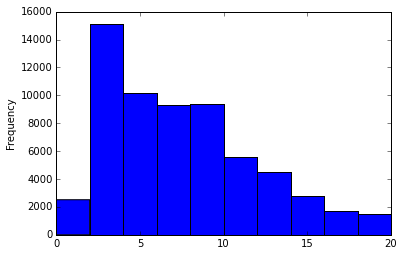

In [13]:
data['price'].plot.hist(range=(0,20))

In [14]:
# before I analyse and plot I will endode the data in categorical values
def encode_column(col):
    loc_keys = col.unique()
    loc_vals = range(len(loc_keys))
    loc_dict = {k:v for k,v in zip(loc_keys,loc_vals)}
    col=col.apply(lambda x: loc_dict[x])
    return col
data['location'] = zip(data['longitude'],data['latitude'])
data['location'] = encode_column(data['location'])
# I noticed there are some names in the postcode
# so remove all chars except numbers
data['postcode'].replace({r'[^0-9]':''}, regex=True, inplace=True)
data['postcode'] = encode_column(data['postcode'])
data['city_id'] = encode_column(data['city_id'])
data

,restaurant_id,restaurant_name,testing,restaurant_description,product_id,variation_id,menu_category,product_name,product_description,price,...,chain_id,restaurant_active,city_id,dietary_characteristics,cuisine_characteristics,taste_characteristics,preparation_style_characteristics,dish_type_characteristics,ingredients,location
0,453,fit kitchen eat fit,0,gesundes fast food,35039,35037,fit pizza,pizza margherita,tomatensauce und fettarmer kaese,6.0,...,NaN,1,0,['lakto vegetarisch'],"['gesundes essen', 'italienisch']","['mild', 'natuerlich']",['gebacken'],['pizza'],"['kaese', 'mehl', 'tomaten']",0
1,453,fit kitchen eat fit,0,gesundes fast food,35040,35038,fit pizza,"pizza salami, putenschinken","fettarme salami, putenschinken und fettarmer k...",8.4,...,NaN,1,0,['lakto vegetarisch'],"['gesundes essen', 'italienisch']",['natuerlich'],['gebacken'],['pizza'],"['kaese', 'mehl', 'salami', 'schinken', 'tomat...",0
2,453,fit kitchen eat fit,0,gesundes fast food,35043,35041,fit pizza,pizza veggie + rucola,"pilze, zwiebeln, rucola und fettarmer kaese",8.4,...,NaN,1,0,"['lakto vegetarisch', 'ohne rindfleisch', 'ohn...","['gesundes essen', 'italienisch']","['mild', 'natuerlich']",['gebacken'],['pizza'],"['kaese', 'mehl', 'pilz', 'rucola', 'tomatensa...",0
3,453,fit kitchen eat fit,0,gesundes fast food,35045,35043,fit pizza,pizza sucuk jalapenos,"fettarme knoblauchwurst, jalapenos und fettarm...",8.4,...,NaN,1,0,NaN,['italienisch'],['natuerlich'],['gebacken'],['pizza'],['jalapeno'],0
4,453,fit kitchen eat fit,0,gesundes fast food,35046,35044,fit pizza,pizza haehnchenbrust,"magere haehnchenbruststreifen, pilze, zwiebeln...",8.9,...,NaN,1,0,['halal'],"['gesundes essen', 'italienisch']",['natuerlich'],['gebacken'],['pizza'],"['haehnchenbrustfilet', 'kaese', 'mehl', 'toma...",0
5,453,fit kitchen eat fit,0,gesundes fast food,35051,35049,fit burger,classic burger,"mageres rindfleisch, eisbergsalat, tomaten, zw...",5.9,...,NaN,1,0,['ohne schweinefleisch'],"['amerikanisch', 'gesundes essen']","['mild', 'natuerlich']",['gebraten'],['burger'],"['eisbergsalat', 'gurke', 'rindfleisch', 'toma...",0
6,453,fit kitchen eat fit,0,gesundes fast food,35052,35050,fit burger,cheese burger,"mageres rindfleisch, low fat kaese, eisbergsal...",6.4,...,NaN,1,0,['ohne schweinefleisch'],"['amerikanisch', 'gesundes essen']","['mild', 'natuerlich']",['gebraten'],['burger'],"['eisbergsalat', 'gurke', 'kaese', 'rindfleisc...",0
7,453,fit kitchen eat fit,0,gesundes fast food,35053,35051,fit burger,chili cheese burger,"mageres rindfleisch, salat, jalapenos und fit ...",7.4,...,NaN,1,0,['ohne schweinefleisch'],"['amerikanisch', 'gesundes essen']","['leicht scharf', 'natuerlich']",['gebraten'],['burger'],"['jalapeno', 'rindfleisch', 'salat']",0
8,453,fit kitchen eat fit,0,gesundes fast food,35059,35057,fit beilagen,fit pommes,mit heissluft frittierte pommes,2.9,...,NaN,1,0,['vegan'],"['amerikanisch', 'gesundes essen']",['natuerlich'],"['frittiert', 'gebacken']",['pommes'],['kartoffel'],0
9,453,fit kitchen eat fit,0,gesundes fast food,35060,35058,fit beilagen,fit coleslaw,fettarmer krautsalat,2.9,...,NaN,1,0,NaN,['international'],['natuerlich'],['fusion mixed'],['extra'],['krautsalat'],0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ca23daa50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7ca23137d0>]], dtype=object)

/usr/lib/python2.7/site-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


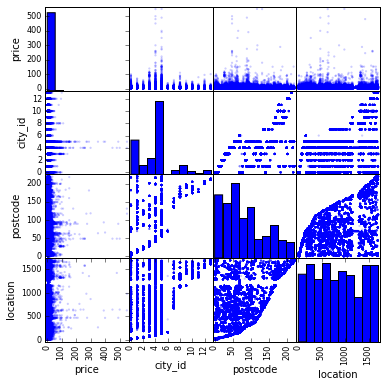

In [15]:
plt.figure()
scatter_matrix(data[['price', 'city_id', 'postcode', 'location']], \
               alpha=0.2, figsize=(6, 6), diagonal='hist')
# plt.show()
# scatter plots are not the best way to evaluate categorical data
# but in this case helps deciding which feature to include
# I would start with city_id since it cleary can detect the cities 
# which have high price ranges
# on the other hand looking into the price, might be worth
# removing these outliers... 

In [16]:
# lets plot some box plots over city_id
# transform the data
grouped=data[['city_id', 'price']].pivot(\
            columns='city_id', index=data.index)
grouped.columns = grouped.columns.droplevel()
print grouped.mean()
print grouped.median()
print grouped.std()
# grouped.boxplot()

city_id
0      8.859622
1      8.020247
2      7.866763
3      9.243218
4     10.374838
5      8.352578
6      8.951942
7      7.110962
8      7.510862
9      8.929326
10     8.213471
11     7.209302
12     7.299817
13     7.589821
dtype: float64
city_id
0     7.5
1     7.1
2     7.5
3     7.5
4     8.5
5     6.0
6     5.9
7     5.9
8     5.9
9     8.0
10    6.8
11    6.0
12    5.9
13    6.5
dtype: float64
city_id
0      6.995574
1      5.536125
2      4.949804
3      9.178261
4     13.700521
5     13.098908
6      7.058375
7      5.139154
8      7.346428
9      5.831879
10     5.995224
11     6.174171
12     6.862750
13     6.097331
dtype: float64


In [17]:
# more or less the distribution of prices across 
# cities is similar, except for 4 and 5 where there
# are some outliers, higher prices, which is evident
# also in the standard deviation value
# grouped_cut=grouped.where(grouped<10.0)
# print grouped_cut.std()
# print grouped_cut.mean()
# print grouped_cut.median()
# grouped_cut.boxplot()

In [18]:
# select the initial dataset which will be trained, remove nans, they are not to many
# so I will just drop them (~18)
test_df = data[['restaurant_name','city_id',\
        'menu_category','product_name','price']].copy()
test_df.dropna(inplace=True)
test_df.reset_index(inplace=True)
print test_df.isnull().sum()

index              0
restaurant_name    0
city_id            0
menu_category      0
product_name       0
price              0
dtype: int64


In [19]:
# as first try I will clean little the menu_category and product_name columns
# which helps a but reducing the dimensionality
# helper function
def primary_transform(col):
    col = col.str.encode('ascii', errors='ignore')
    col.replace({r'[^a-zA-Z\s]':''},regex=True,inplace=True)
    col = col.apply(lambda x:GermanStemmer().stem(x))
    return col
test_df['menu_category'] = primary_transform(\
                            test_df['menu_category'])

test_df['product_name'] = primary_transform(\
                            test_df['product_name'])
test_df['restaurant_name'] = primary_transform(\
                            test_df['restaurant_name'])
print len(data['menu_category'].unique()), len(test_df['menu_category'].unique())
print len(data['product_name'].unique()), len(test_df['product_name'].unique())
print len(data['restaurant_name'].unique()), len(test_df['restaurant_name'].unique())

3334 3202
44844 41359
1515 1508


In [23]:
# First I will try with running char 1-grams over the menu_category and product_name
# Here for example I can include also restaurant_name instead of restaurant_id
# Since if I generate dummies over restaurant_id I will get more features 
# than using char 1-gram over restaurant_name, but lets try
# I can try with char 2-grams, 1grams and 2grams (words)
# helper function
def run_vectorizer(col, char_vectorizer):
    vect_col = char_vectorizer.fit_transform(col)
    vect_df=pd.DataFrame(vect_col.toarray())
    prfx = col.name+'_'
    vect_df.columns= [prfx+str(el) for el in vect_df.columns]
    return vect_df, sparse.csc_matrix(vect_col)

char_vectorizer = CountVectorizer(ngram_range=(1,2),analyzer='char',strip_accents='ascii', min_df=0.005, token_pattern='\w')
(menu_df, menu_csc)= run_vectorizer(test_df['menu_category'], char_vectorizer)
(prod_df, prod_csc) = run_vectorizer(test_df['product_name'], char_vectorizer)
(rest_df, rest_csc) = run_vectorizer(test_df['restaurant_name'], char_vectorizer)
# print menu_df.head
print prod_df.shape
print char_vectorizer.vocabulary_
print len(char_vectorizer.vocabulary_)
# I played with min_df for char 2-ngrams in order to 
# get smaller vocabylary and therfore smaller number of
# features
# I can also get them all and try PCA, NMF or Kbest to reduce features

(65481, 353)
{u' b': 2, u' c': 3, u'gu': 122, u' a': 1, u' f': 6, u'gr': 121, u' d': 4, u' e': 5, u' j': 10, u' k': 11, u' h': 8, u' i': 9, u' n': 14, u' o': 15, u' l': 12, u' m': 13, u' r': 17, u' s': 18, u' p': 16, u' v': 21, u' w': 22, u' t': 19, u' u': 20, u'go': 120, u'gl': 119, u'gi': 118, u' g': 7, u' ': 0, u'tz': 291, u'ty': 290, u'tt': 288, u'tu': 289, u'tr': 286, u'ts': 287, u'tn': 284, u'to': 285, u'th': 282, u'ti': 283, u'te': 281, u'tc': 280, u'ta': 279, u'g ': 115, u'mb': 184, u'ge': 117, u'p': 233, u't ': 278, u'zo': 330, u'ga': 116, u'ze': 328, u'za': 326, u'zb': 327, u' z': 24, u'zz': 332, u'zu': 331, u' y': 23, u'v': 307, u'z ': 325, u'k': 159, u'm ': 182, u'vi': 310, u'me': 185, u'ma': 183, u'f': 105, u'mm': 187, u'mo': 188, u'mi': 186, u'mu': 190, u'mp': 189, u'my': 191, u'o': 210, u's ': 266, u'fr': 112, u'fu': 113, u'fa': 106, u'fe': 107, u'ff': 108, u'fi': 109, u'fl': 110, u'fo': 111, u'a': 25, u'ss': 274, u'sp': 273, u'su': 276, u'st': 275, u'si': 271, u'sh': 27

In [25]:
print menu_csc.shape

(65481, 261)


In [26]:
print menu_df.shape
print rest_df.shape

(65481, 261)
(65481, 333)


In [28]:
def get_col_dummies(col):
    d_df = pd.get_dummies(col)
    prfx = col.name+'_'
    d_df.columns= [prfx+str(el) for el in d_df.columns]
    d_df.reset_index(inplace=True)
    d_df.drop(labels=['index'], axis=1,inplace=True)
    return d_df
# restaurant_id = get_col_dummies(test_df['restaurant_id'])
city_id = get_col_dummies(test_df['city_id'])
cid_csc = sparse.csr_matrix(city_id.values)
# print restaurant_id.shape
# restaurant_id encoded will add 1520 new features 
# so i will now try with the name
# or i can try only with the original caategorical ids?
print city_id.shape

(65481, 14)


In [48]:
X=sparse.hstack((cid_csc,menu_csc, prod_csc, rest_csc))
# used for for the 2grams
# selected 961 features for the char 2 grams

In [49]:
# X = pd.concat((menu_df, prod_df, rest_df, city_id), axis=1)
y = test_df['price'].values
print X.shape
print y.shape
# set some split parameters which I can tune
# I will split now to train and test, but I will performe
# cross validation that will internaly use my train set 
# for train-test cross validations
seed = 7
test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
print X_train.shape
print X_test.shape
X_test

(65481, 961)
(65481,)
(58932, 961)
(6549, 961)


<6549x961 sparse matrix of type '<type 'numpy.int64'>'
	with 415184 stored elements in Compressed Sparse Row format>

In [53]:
X

<6549x961 sparse matrix of type '<type 'numpy.int64'>'
	with 415184 stored elements in Compressed Sparse Row format>

In [ ]:
def decompose(d_tr, d_te decomposer):
    decomp = decomposer.fit(d_tr)
    components = decomp.reshape((decomp.n_components, d.shape[0], d.shape[1]))
    d_tr = decomposer.transform(d_tr)
    d_te = decomposer.transform(d_te)
    return d_tr, d_te, components

# feature selection with ch^2
# ch2 = SelectKBest('chi2', k=opts.select_chi2)
# pca = PCA()

In [63]:
# normalize the training data
from sklearn.preprocessing import MinMaxScaler
min_scale = MinMaxScaler()
# abs_scaler for sparse matrices
from sklearn.preprocessing import MaxAbsScaler
abs_scaler = MaxAbsScaler()
def scale_data(d, scaler):
    d = scaler.fit_transform(d)
    return d
    
X_train = scale_data(X_train, abs_scaler)
# normalize testing data
X_test = scale_data(X_test, abs_scaler)
X_test

<6549x961 sparse matrix of type '<type 'numpy.float64'>'
	with 415184 stored elements in Compressed Sparse Row format>

In [54]:
# helper function to calculate mean
# absolute error on the predictions
# is not sensitive on outliers so
# its what I want for now
def calc_mae(y, y_pred):
    s = 0.0
    for real, pred in zip(y,y_pred):
        s+=abs(real-pred)
    return s/y.shape[0]

In [55]:
# out of curiosity lets try dummy regressor
dummy = DummyRegressor()
dummy.fit(X_train, y_train)
print dummy.score(X_train, y_train) 
print dummy.score(X_test, y_test)
y_pred_dummy = dummy.predict(X_test)
print calc_mae(y_test, y_pred_dummy)
# 0.0
# -4.60667813531e-05
# 4.99922347886
# gives memory error for char 2-grams

0.0
-4.60667813531e-05
4.99922347886


In [64]:
# now I can try several regressors
# lets start with the simplest one
# ridge regression with leave-one-out cv
# and cv=3 both very bad results!
ridge = RidgeCV()
ridge.fit(X_train, y_train)
print ridge.score(X_train, y_train)
print ridge.score(X_test, y_test)
y_pred_ridge = ridge.predict(X_test)
print calc_mae(y_test, y_pred_ridge)
# cv=3
# 0.124112973512
# 0.114624232585
# 4.50893331164

MemoryError: 

In [21]:
# XGB regressor takes in account the feature names
# let check if they are same and sorted for train and test set
# try:
#     X_train.shape==X_test.shape
# except:
#     print 'The train and test set dont have same features!!!'
# try:
#     X_train.columns==X_test.columns
# except:
#     print 'The columns are not in order, I will resort them'
#     X_test=X_test[X_train.columns]

In [66]:
xgb_cv = GridSearchCV(XGBRegressor(), cv=3, param_grid={
            'max_depth':[3,10], 
            'learning_rate':[0.1, 1], 
            'n_estimators':[50,100,150]
            })
xgb_cv.fit(X_train, y_train)
best=xgb_cv.best_estimator_

In [67]:
print best
# with char 1&2-gram
# XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
#        colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
#        max_depth=10, min_child_weight=1, missing=None, n_estimators=150,
#        n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
#        reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#        silent=True, subsample=1)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=150,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)


In [68]:
print xgb_cv.cv_results_

{'std_train_score': array([ 0.03744393,  0.03584124,  0.0313971 ,  0.01310336,  0.00727452,
        0.00412107,  0.01617212,  0.01025015,  0.00575816,  0.00385936,
        0.00438984,  0.00454272]), 'rank_test_score': array([12,  6,  4,  3,  2,  1, 11,  7,  5,  8,  9, 10], dtype=int32), 'param_max_depth': masked_array(data = [3 3 3 10 10 10 3 3 3 10 10 10],
             mask = [False False False False False False False False False False False False],
       fill_value = ?)
, 'split1_train_score': array([ 0.4491584 ,  0.53541028,  0.59754317,  0.85690959,  0.91165856,
        0.93369041,  0.68103722,  0.77272039,  0.82370649,  0.96124111,
        0.97446404,  0.97730134]), 'split2_train_score': array([ 0.50831732,  0.59404539,  0.63777812,  0.8710618 ,  0.92120455,
        0.94134851,  0.72063442,  0.79446123,  0.83052988,  0.9666595 ,
        0.97828065,  0.98106744]), 'std_score_time': array([ 0.0034361 ,  0.00620797,  0.00288843,  0.00742876,  0.01362832,
        0.0181058 ,  0.00500

In [69]:
print best.score(X_train, y_train)
# char 1-gram 0.933472167842
# char 2-gram 0.92853410091

0.92853410091


In [70]:
print best.score(X_test, y_test)
# char 1-gram 0.412783157566
# char 2-gram 0.558655700322 # still overfitting

0.558655700322


In [71]:
y_pred_xgb=best.predict(X_test)
print calc_mae(y_test, y_pred_xgb)
# char 1-gram 2.78123641425
# at least better than rdige, we can tip 2.7eur :D
# evident overfitting
# char 2-gram 2.20507859734 ! not normalzied data, check
# 2.54247458012 on normalized

2.54247458012


In [30]:
rf_cv=GridSearchCV(RandomForestRegressor(), cv=3, param_grid={
        'n_estimators':[100,150],
        'max_depth':[4,6,10]
})
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 150], 'max_depth': [4, 6, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [31]:
best_rf=rf_cv.best_estimator_

In [33]:
print best_rf
print best_rf.score(X_train, y_train)
print best_rf.score(X_test, y_test)
y_pred_rf=best_rf.predict(X_test)
print calc_mae(y_test, y_pred_rf)
# RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
#            max_features='auto', max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
#            oob_score=False, random_state=None, verbose=0, warm_start=False)
# 0.667579015613
# 0.394838850379
# 3.44751040869
# xgboost is better

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
0.667579015613
0.394838850379
3.44751040869


In [83]:
# Next to try tfidf vectorizer where I can generate ngrams and cut the vocabulary 
# based on the on max and min document frequency
texts = test_df['restaurant_name'] + ' '+ test_df['menu_category'] + ' ' \
    + test_df['product_name'] #+ ' ' + test_df['product_description']
# texts = list(map(str, texts))
texts[0]

u'fit kitchen eat fit fit pizza pizza margherita'

In [84]:
import spacy
import de_core_news_sm
nlp = de_core_news_sm.load()

In [ ]:
texts = list(map(nlp, texts))
print(texts[0])

In [ ]:
def generate_tfidf_features(texts, mindf, maxf):
    vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=mindf, max_features=mindf)
    vectorized = vectorizer.fit_transform(texts)
    return vectorized

In [ ]:
# instead of limiting max features I can try PCA 
mindf = 5
maxf = 1000
text_feats = generate_tfidf_features(texts, mindf, maxf)
print(text_feats.shape)
full_feats = sparse.hstack([cid_csc, text_feats])
print(full_feats.shape)
